<a href="https://colab.research.google.com/github/Rig12332113/ML_practice/blob/main/machine_learning_practice1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Get Data

In [2]:
import pandas as pd
import numpy as np


# get training data
url = "https://raw.githubusercontent.com/Rig12332113/ML_practice/main/practice1%3Aregression/covid_train.csv?token=GHSAT0AAAAAACWN3K4LXGG34IZWJU47U2ZWZWHGBAQ"
train_data_pd = pd.read_csv(url)
train_data = train_data_pd.to_numpy()

# get testing data
#url = "https://raw.githubusercontent.com/Rig12332113/ML_practice/main/practice1%3Aregression/covid_test.csv?token=GHSAT0AAAAAACWN3K4LFNBU6GI3KBEDBMFIZWHBCNA"
#test_data = pd.read_csv(url)
#test_data.to_numpy()


In [89]:
type(train_data)
train_data

array([[0.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.70441440e+00, 3.92223292e+01, 1.84907873e+01],
       [1.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.47497290e+00, 4.12090731e+01, 1.63292532e+01],
       [2.00000000e+00, 1.00000000e+00, 0.00000000e+00, ...,
        2.56994020e+00, 3.96368156e+01, 1.65229315e+01],
       ...,
       [3.00600000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        6.15799930e+00, 3.14924054e+01, 6.15139380e+00],
       [3.00700000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        5.88602810e+00, 3.23381002e+01, 7.16558010e+00],
       [3.00800000e+03, 0.00000000e+00, 0.00000000e+00, ...,
        6.17932320e+00, 3.18610673e+01, 1.05350871e+01]])

# 2. setting torch


In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

if torch.cuda.is_available():
    device = torch.device("cuda")
else:
    device = torch.device("cpu")

RANDOM_SEED = 42
torch.manual_seed(RANDOM_SEED)


In [4]:
#train_data.shape, test_data.shape
TEST_RATIO = 0.2
train_data_size = round(train_data.shape[0] * (1 - TEST_RATIO))
#train_data = torch.from_numpy(train_data).type=torch.float

X_train = train_data[:train_data_size, :-1]
X_test = train_data[train_data_size:, :-1]
y_train = train_data[:train_data_size:, -1]
y_test = train_data[train_data_size:, -1]

X_train = torch.from_numpy(X_train).type(torch.float).to(device)
X_test = torch.from_numpy(X_test).type(torch.float).to(device)
y_train = torch.from_numpy(y_train).type(torch.float).to(device)
y_test = torch.from_numpy(y_test).type(torch.float).to(device)


In [165]:
X_train.size(), X_test.size(), y_train.size(), y_test.size()

(torch.Size([2407, 88]),
 torch.Size([602, 88]),
 torch.Size([2407]),
 torch.Size([602]))

In [174]:
y_train.dtype, y_test.dtype

(torch.float32, torch.int32)

# 3. Build model

In [123]:
INPUT_SIZE = 88
OUTPUT_SIZE = 1
class model0(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(INPUT_SIZE, OUTPUT_SIZE)
    def forward(self, X):
        return self.linear(X)

model_0 = model0().to(device)
#list(model_0.parameters())

# 4. Pick loss function and optimizer

In [127]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_0.parameters(), lr=0.1)


# 5. training

In [117]:
def train(model, loss_fn, optimizer, train_data, train_label, epoch):
    pred = model(train_data).squeeze()
    loss = loss_fn(pred, train_label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch % 50 == 0:
        print(f"Epoch: {epoch}, Loss: {loss.item()}")

def test(model, loss_fn, optimizer, test_data, test_label):
    model.eval()
    with torch.inference_mode():
        pred = model(test_data).squeeze()
        loss = loss_fn(pred, test_label)
        print(f"Test Loss: {loss.item()}")
    return pred

In [130]:
EPOCHS = 500
for epoch in range(EPOCHS):
    train(model_0, loss_fn, optimizer, X_train, y_train, epoch)
pred = test(model_0, loss_fn, optimizer, X_test, y_test)


Epoch: 0, Loss: 1.4927467107772827
Epoch: 50, Loss: 1.4366214275360107
Epoch: 100, Loss: 1.3876752853393555
Epoch: 150, Loss: 1.3442546129226685
Epoch: 200, Loss: 1.305418848991394
Epoch: 250, Loss: 1.2705503702163696
Epoch: 300, Loss: 1.2391873598098755
Epoch: 350, Loss: 1.210951805114746
Epoch: 400, Loss: 1.1855149269104004
Epoch: 450, Loss: 1.1625827550888062
Test Loss: 1.203270435333252


# 6. Evaluate

In [196]:
def acc(pred, truth):
    count = 0
    for i in range(pred.size()[0]):
        if (pred[i] == truth[i]):
            count += 1
    return count / pred.size()[0] * 100


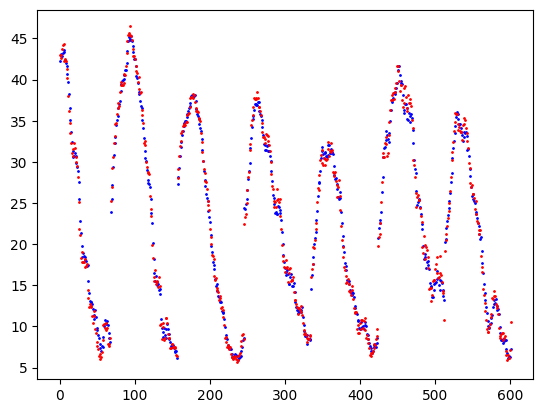

In [131]:
import matplotlib.pyplot as plt
index = [i for i in range(pred.size()[0])]
plt.scatter(index, pred.cpu(), c='b', s=1)
plt.scatter(index, y_test.cpu(), c='r', s=1)
plt.show()

# 7. Try different model

In [159]:
INPUT_SIZE = 88
HIDDEN_SIZE = 128
OUTPUT_SIZE = 1
class model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear_stack = nn.Sequential(
            nn.Linear(INPUT_SIZE, HIDDEN_SIZE),
            nn.ReLU(),
            nn.Linear(HIDDEN_SIZE, OUTPUT_SIZE)
        )
    def forward(self, X):
        return self.linear_stack(X)

model_1 = model1().to(device)
#list(model_1.parameters())

In [160]:
loss_fn = nn.MSELoss()
optimizer = optim.Adam(model_1.parameters(), lr=0.01)


In [161]:
EPOCHS = 1000
for epoch in range(EPOCHS):
    train(model_1, loss_fn, optimizer, X_train, y_train, epoch)
pred = test(model_1, loss_fn, optimizer, X_test, y_test)

Epoch: 0, Loss: 5139.18408203125
Epoch: 50, Loss: 29.91853141784668
Epoch: 100, Loss: 9.964245796203613
Epoch: 150, Loss: 7.143641471862793
Epoch: 200, Loss: 6.035637855529785
Epoch: 250, Loss: 5.182222843170166
Epoch: 300, Loss: 4.4394426345825195
Epoch: 350, Loss: 3.7748029232025146
Epoch: 400, Loss: 3.2109792232513428
Epoch: 450, Loss: 2.746454954147339
Epoch: 500, Loss: 2.371325731277466
Epoch: 550, Loss: 2.088252544403076
Epoch: 600, Loss: 1.882554054260254
Epoch: 650, Loss: 1.729873538017273
Epoch: 700, Loss: 1.614902138710022
Epoch: 750, Loss: 1.5299149751663208
Epoch: 800, Loss: 1.4673467874526978
Epoch: 850, Loss: 1.4165074825286865
Epoch: 900, Loss: 1.375850796699524
Epoch: 950, Loss: 1.3414922952651978
Test Loss: 1.634769082069397


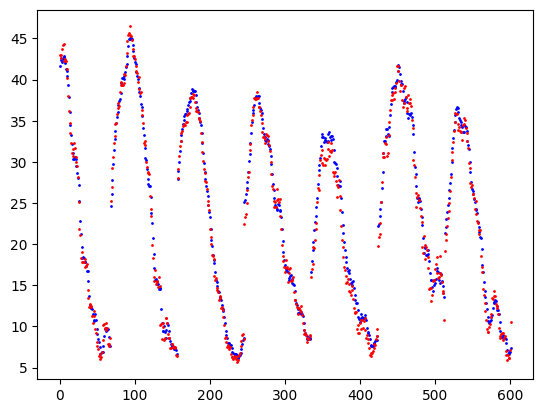

In [162]:
import matplotlib.pyplot as plt
index = [i for i in range(pred.size()[0])]
plt.scatter(index, pred.cpu(), c='b', s=1)
plt.scatter(index, y_test.cpu(), c='r', s=1)
plt.show()